# Android Market Analysis

by [Prashant Brahmbhatt](https://www.github.com/hashbanger)

--------------

![App](https://ewerdroid.com.br/wp-content/uploads/2018/02/maxresdefault-1440x564_c.jpg)

### Imports

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

In [276]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [277]:
plt.style.use('ggplot')

### Importing the data

In [278]:
df = pd.read_csv('googleplaystore.csv')

In [279]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [280]:
print("The shape of the data is ",df.shape)

The shape of the data is  (10841, 13)


#### Data Summary

In [281]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


Rating is the only numerical column in the data

## Missing values

First glance at the missing values

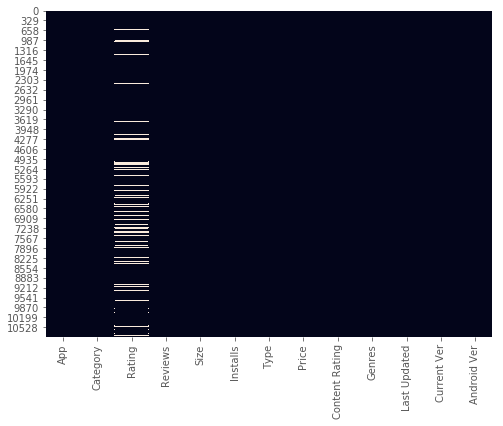

In [282]:
plt.figure(figsize=(8,6,))
sns.heatmap(df.isnull(), cbar = False)

Observation: (**Heatmap**)  
We can observe that there are considerable missing values in the **Rating** column

In [283]:
total = df.isnull().sum().sort_values(ascending  = False)
percent = (df.isnull().sum()/df.count()).sort_values(ascending = False)
temp = pd.concat([total, percent], axis = 1, keys = ['total','percentage'])
temp.head()

,total,percentage
Rating,1474,0.157361
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


There are some amount of missing values in other columns as well which are initially not observable in the heatmap

In [284]:
#Dropping observations having missing values in any column
df.dropna(how = 'any', inplace = True)

#### Checking for Duplicate apps

In [285]:
print("Length of Unique App names = ", len(df['App'].unique()))
print("Legth of the Total App name = ", df.shape[0])
print("Duplicate Apps = ",df.shape[0]- len(df['App'].unique()))

Length of Unique App names =  8190
Legth of the Total App name =  9360
Duplicate Apps =  1170


We can see that there are 1181 duplicate apps, and this is true as we can see for some apps like:

In [286]:
df[df['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


So we better remove duplicacy as well and keeping first observations

In [287]:
df.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

______

## EDA

Visualising the percetages of CATEGORIES in the playstore

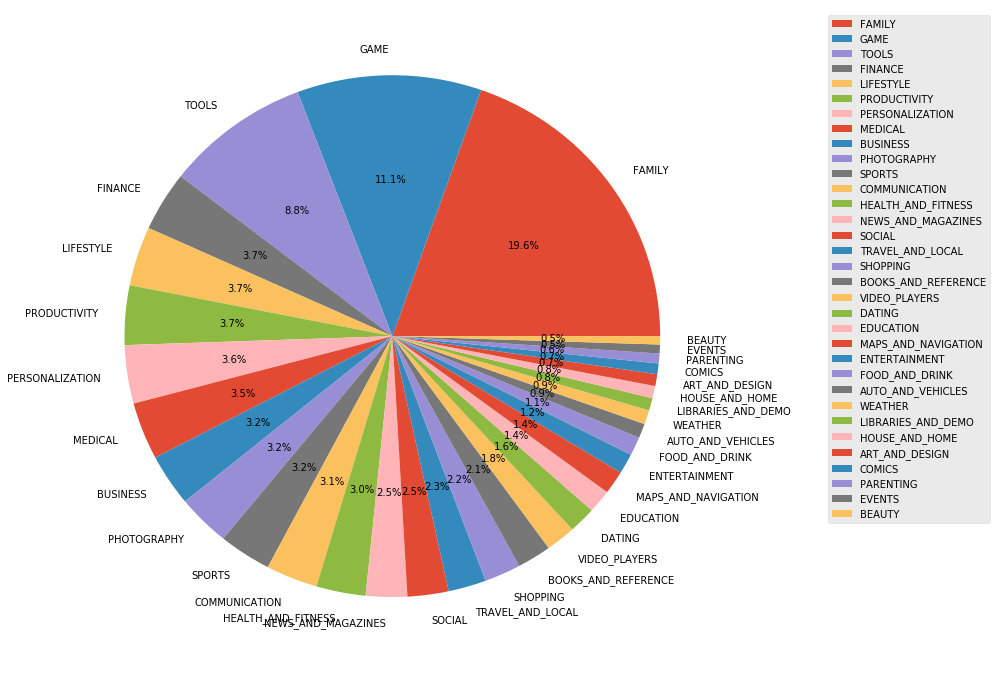

In [288]:
temp = df['Category'].value_counts().reset_index() #A temporary dataframe for this plot

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Observation: (**Pie Chart**)  
The **FAMILY**, **EVENTS** and **TOOLS** are the most dominating applications in the playstore

### -----------------------------------------------------RATING---------------------------------------------------------------------------

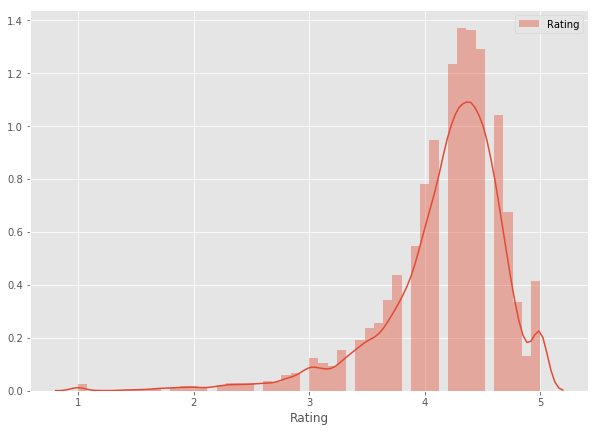

In [289]:
plt.figure(figsize=(10,7))
sns.distplot(df['Rating'])
plt.legend(['Rating'])
plt.show()

In [290]:
print("The average rating in the appstore is ",np.average(df['Rating']))

The average rating in the appstore is  4.173321123321124


Visualising the most often rated catgories

In [291]:
top = np.array(df.Category.value_counts().reset_index()['index'])
print("Most Occuring Categories\n",top[:6])

Most Occuring Categories
 ['FAMILY' 'GAME' 'TOOLS' 'FINANCE' 'LIFESTYLE' 'PRODUCTIVITY']


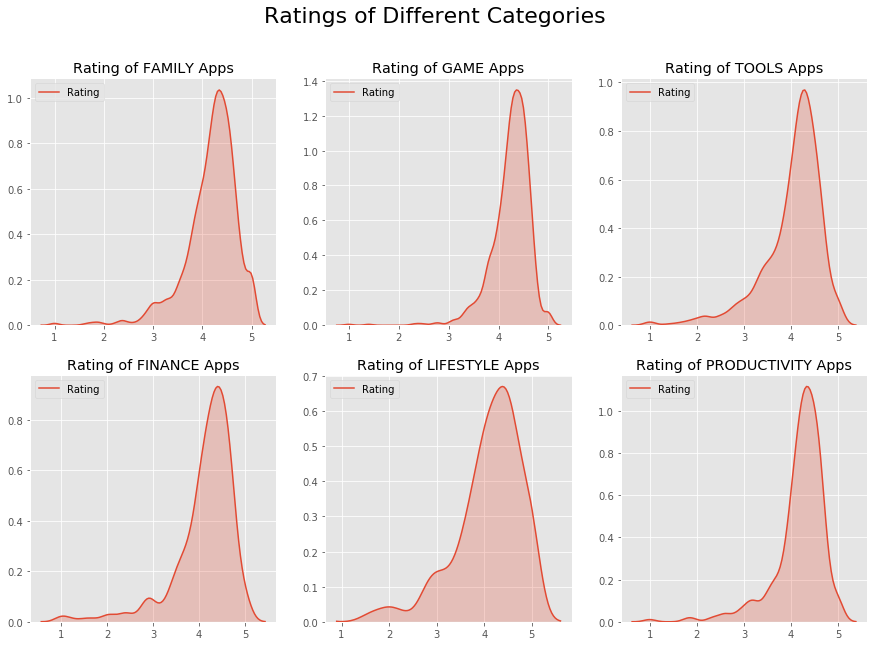

In [292]:
plt.figure(figsize= (15,10))
plt.suptitle("Ratings of Different Categories",fontsize = 22)

plt.subplot(2,3,1)
sns.kdeplot(df[df['Category'] == 'FAMILY']['Rating'], shade = True)
plt.title('Rating of FAMILY Apps')

plt.subplot(2,3,2)
sns.kdeplot(df[df['Category'] == 'GAME']['Rating'], shade = True)
plt.title('Rating of GAME Apps')


plt.subplot(2,3,3)
sns.kdeplot(df[df['Category'] == 'TOOLS']['Rating'], shade = True)
plt.title('Rating of TOOLS Apps')


plt.subplot(2,3,4)
sns.kdeplot(df[df['Category'] == 'FINANCE']['Rating'], shade = True)
plt.title('Rating of FINANCE Apps')


plt.subplot(2,3,5)
sns.kdeplot(df[df['Category'] == 'LIFESTYLE']['Rating'], shade = True)
plt.title('Rating of LIFESTYLE Apps')


plt.subplot(2,3,6)
sns.kdeplot(df[df['Category'] == 'PRODUCTIVITY']['Rating'], shade = True)
plt.title('Rating of PRODUCTIVITY Apps')

plt.show()

We can observe that ratings vary according to the categories

#### ANOVA Analysis

Null Hypothesis - All Means are equal 
Alternate Hypothesis - Atleast one mean is different

In [293]:
import scipy.stats as stats
htest = stats.f_oneway(df[df['Category'] == 'FAMILY']['Rating'],
              df[df['Category'] == 'GAME']['Rating'],
              df[df['Category'] == 'TOOLS']['Rating'],
              df[df['Category'] == 'FINANCE']['Rating'],
              df[df['Category'] == 'PRODUCTIVITY']['Rating'],
              df[df['Category'] == 'LIFESTYLE']['Rating'],
              )
print("The P value of the test is ",htest[1])

The P value of the test is  2.7987121451752834e-13


Since the **p-Value** is small we reject the Null Hypothesis

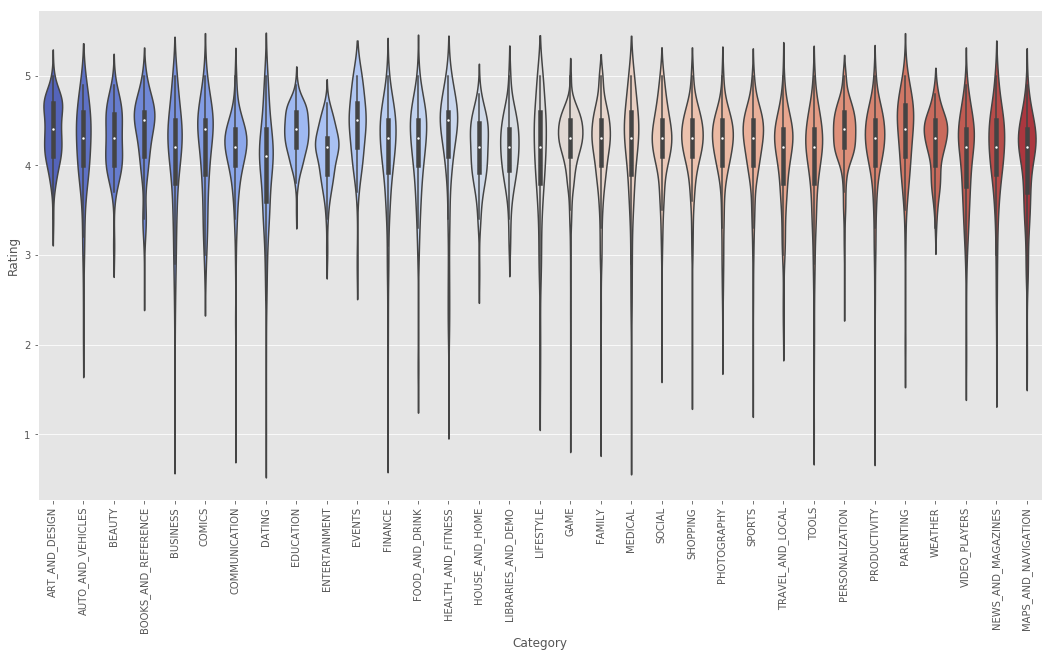

In [294]:
plt.figure(figsize=(18,9))
f = sns.violinplot(x = df['Category'], y = df['Rating'], palette= 'coolwarm')
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.show()

Categories like **EVENTS** , **BOOKS_AND_REFERENCE** and **HEALTH_AND_FITNESS** are the best performing with more than half of the apps rated above average.  
While categories like **DATING** are worst performing.

### -----------------------------------------------------REVIEWS---------------------------------------------------------------------------

In [295]:
print(df['Reviews'].head())

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object


Converting the value to integer type

Text(0.5,1,'Distribution of Ratings')

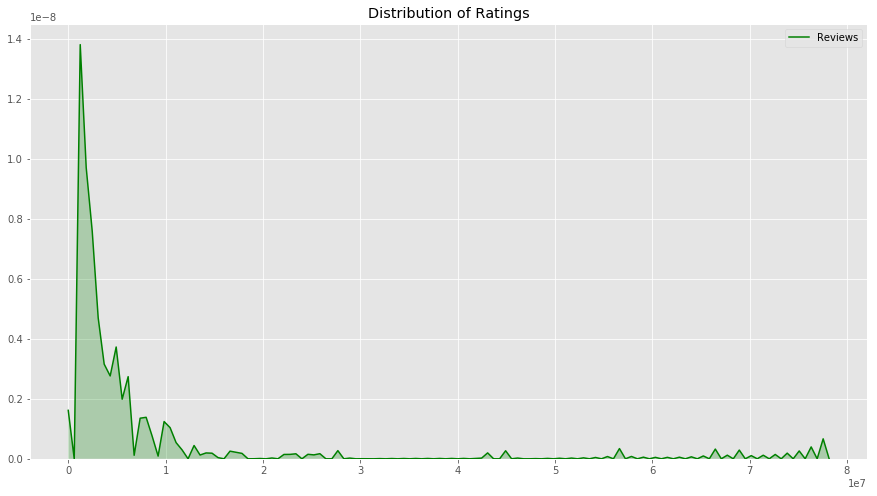

In [296]:
df['Reviews'] = df['Reviews'].astype(dtype = 'int')
plt.figure(figsize=(15,8))
sns.kdeplot(df['Reviews'], color = 'Green', shade = True)
plt.title('Distribution of Ratings')

In [297]:
print("Number of Apps with more than 1M reviews",df[df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",df[df['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

Number of Apps with more than 1M reviews 349

Top 20 apps with most reviews: 
 2544                                             Facebook
336                                    WhatsApp Messenger
2545                                            Instagram
335              Messenger – Text and Video Chat for Free
1670                                       Clash of Clans
4005              Clean Master- Space Cleaner & Antivirus
1654                                       Subway Surfers
3665                                              YouTube
7536    Security Master - Antivirus, VPN, AppLock, Boo...
1660                                         Clash Royale
1655                                     Candy Crush Saga
378           UC Browser - Fast Download Private & Secure
2550                                             Snapchat
4568      360 Security - Free Antivirus, Booster, Cleaner
1722                                       My Talking Tom
1675                                          8 Bal

![Fb](https://parentinfo.org/sites/default/files/styles/main_article_image/public/Social_Media_image_New_IG_Logo.png?itok=jDLmx9B5)


### Ratings vs Reviews

For all apps


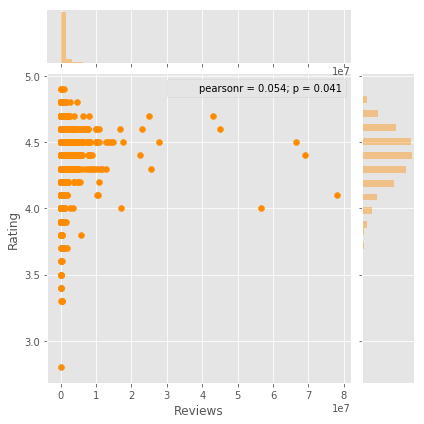

For apps below 1M reviews


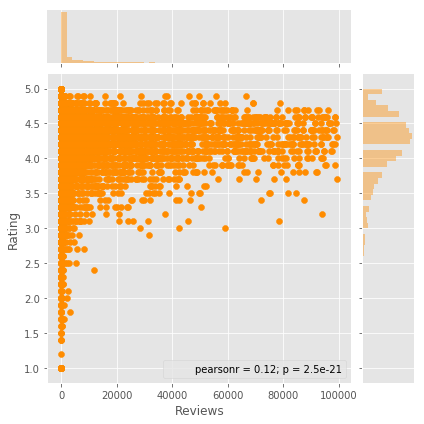

In [298]:
print("For all apps")
sns.jointplot(x = 'Reviews', y= 'Rating',data = df[df['Reviews']>100000], color = 'darkorange') 
plt.show()

print("For apps below 1M reviews")
sns.jointplot(x = 'Reviews', y= 'Rating',data = df[df['Reviews']<100000], color = 'darkorange') 
plt.show()

Observation: (**Joint Scatter Plot**)  
The most reviewed apps are likely to be better rated as well

### ----------------------------------------------------- INSTALLS---------------------------------------------------------------------------

In [299]:
df['Installs'].dtype

dtype('O')

Since the data type is still object we should convert it to integer for plotting 

In [300]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Before parsing to integer we better remove the commas and plus symbols

In [301]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].astype(dtype = 'int')

In [302]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [303]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

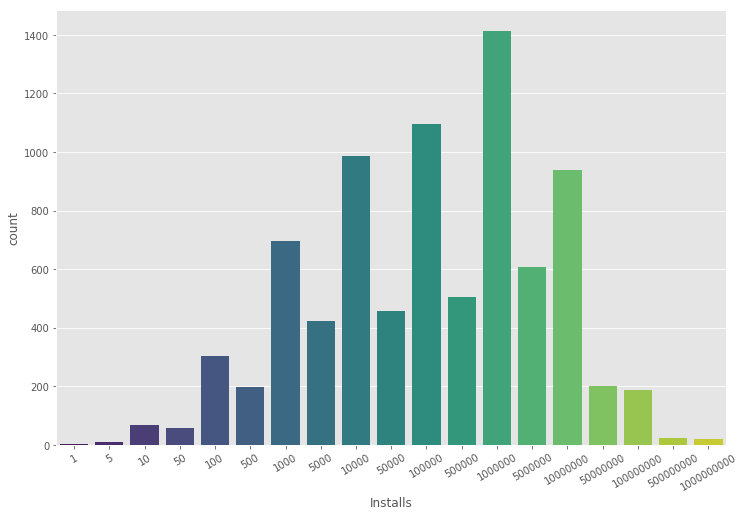

In [304]:
plt.figure(figsize=(12,8))
f = sns.countplot(df['Installs'], palette= "viridis" )
f.set_xticklabels(f.get_xticklabels(), rotation = 30)
plt.show()

We can observe that largest number of apps belong to 1M+ installs 

We can treat these values as intervals and map them to numeric categories as:  
5+ installs --> 1  
50+ installs --> 2


In [305]:
sorted_values = sorted(df['Installs'].unique())
df['Installs Classes'] = df['Installs'].replace(sorted_values, range(0,len(sorted_values)))
df['Installs Classes'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs Classes, dtype: int64

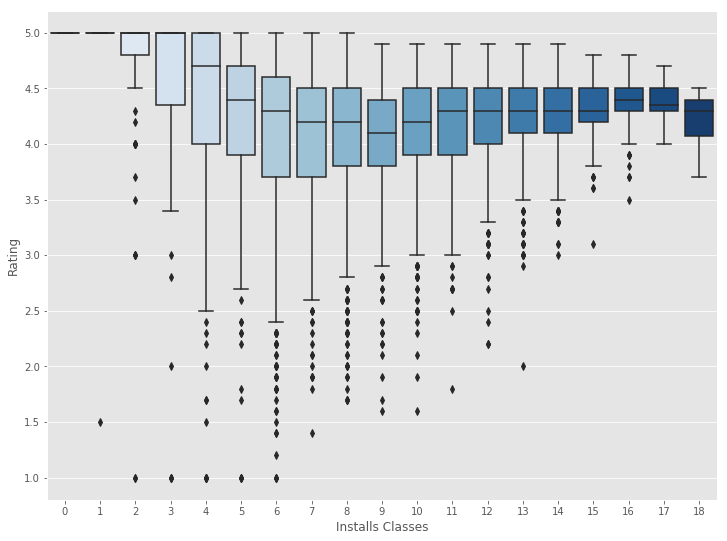

In [306]:
plt.figure(figsize=(12,9))
sns.boxplot(y = df['Rating'], x = df['Installs Classes'], palette= 'Blues')
plt.show()

It seems that there is less variation in **Rating** of apps with higher **Installs**

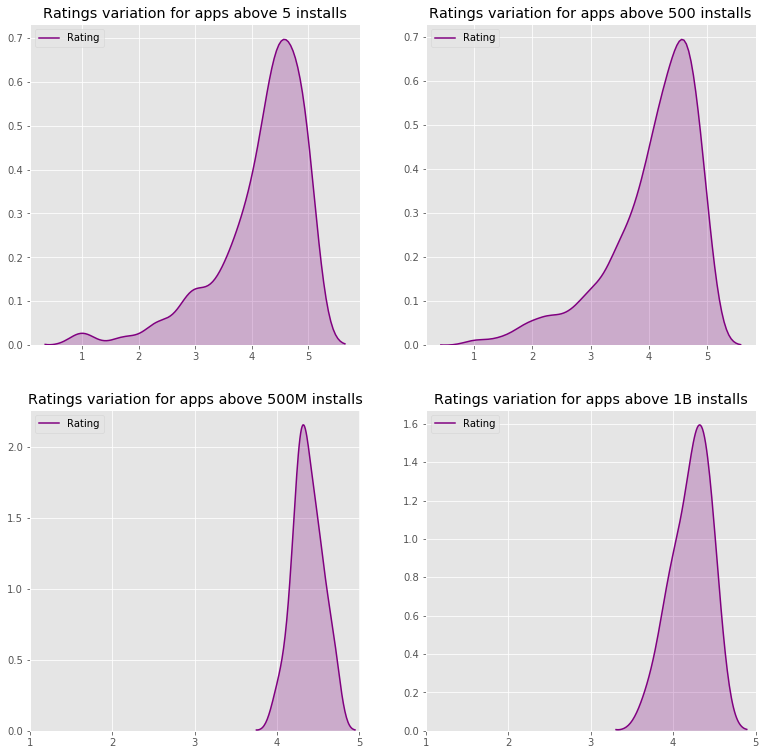

Variation in Rating of installs above 100 installs  0.19220659514434993
Variation in Rating of installs above 500 installs  0.19421616269909778
Variation in Rating of installs above 500M installs  0.03972695926593183
Variation in Rating of installs above 1B installs  0.05212709974548002


In [307]:
import scipy.stats as sp

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
f = sns.kdeplot(df[df['Installs Classes'] == 5]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 5 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,2)
f = sns.kdeplot(df[df['Installs Classes'] == 6]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500 installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,3)
f = sns.kdeplot(df[df['Installs Classes'] == 17]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 500M installs")
f.set_xticks([1,2,3,4,5])

plt.subplot(2,2,4)
f = sns.kdeplot(df[df['Installs Classes'] == 18]['Rating'], shade = True, color = 'purple')
plt.title("Ratings variation for apps above 1B installs")
f.set_xticks([1,2,3,4,5])

plt.show()
print("Variation in Rating of installs above 100 installs ",sp.variation(df[df['Installs Classes'] == 5]['Rating']))
print("Variation in Rating of installs above 500 installs ",sp.variation(df[df['Installs Classes'] == 6]['Rating']))
print("Variation in Rating of installs above 500M installs ",sp.variation(df[df['Installs Classes'] == 17]['Rating']))
print("Variation in Rating of installs above 1B installs ",sp.variation(df[df['Installs Classes'] == 18]['Rating']))


From the above distributions it is evident that higher installed apps have less variation in their ratings.

### ----------------------------------------------------- SIZE---------------------------------------------------------------------------

In [308]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [309]:
print(df['Size'].unique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

There's an uncanny observation as a value has label like *'Varies with device'* rather than the actual size. So we better replace it with some mean or median values

There are two problems with this column:  
* It contains values named 'Varies with device'
* It contains *M*s and *k*s in the size
* Type of values is string

We can't omit the Ms and Ks since that would mess up the KB and MB size scale. So we convert the MBs to KBs.  
One way to do this is below

In [310]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '*1000'))
df['Size'] = df['Size'].apply(lambda x: x.replace('k', ''))

Using -1 as the signal for the values 'Varies with device' as it will allow eval to be used on the column.

In [311]:
df['Size'].replace('Varies with device', '-1', inplace = True)

In [312]:
df['Size'] = df['Size'].apply(lambda x: eval(x))

In [313]:
df['Size'] = df['Size'].replace(-1,np.nan) #Changing the values to null then we can fill them with mean value
df['Size'].fillna(np.mean(df['Size']), inplace = True) 

Noew all the sizes in the data are in KB scale

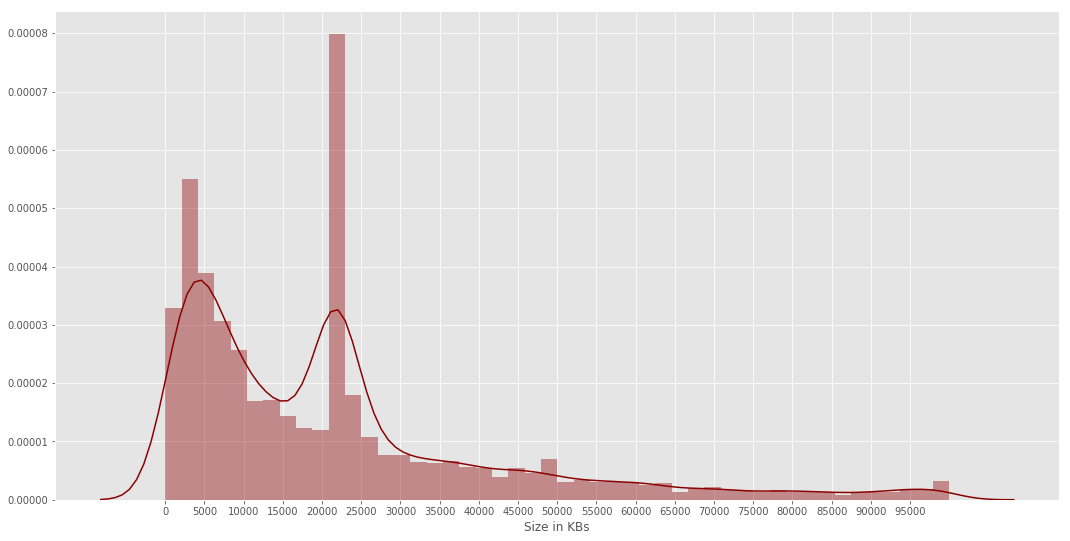

In [314]:
plt.figure(figsize=(18,9))
sns.distplot(df['Size'], color = 'darkred')
plt.xlabel('Size in KBs')
plt.xticks(list(range(0, int(max(df['Size'])), 5000)))
plt.show()

We can clearly observe the peaks near 20MBs and 4-5MBs so most apps are commonly of that size 

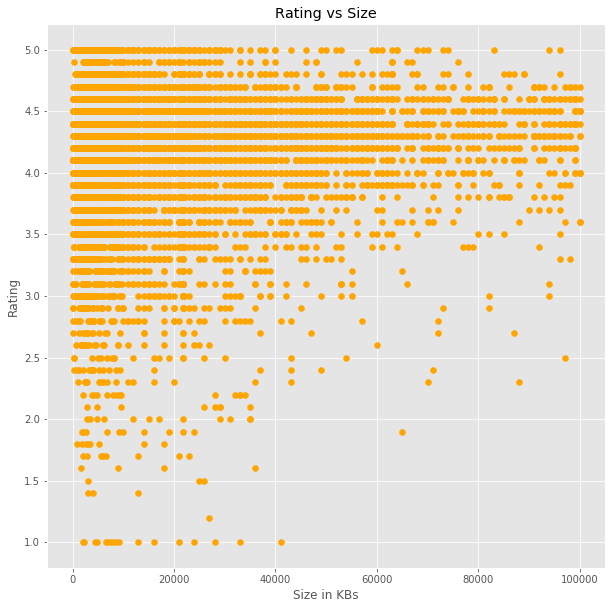

In [315]:
plt.figure(figsize=(10,10))
plt.scatter(x = df['Size'], y = df['Rating'], color = 'orange')
plt.xlabel('Size in KBs')
plt.ylabel('Rating')
plt.title('Rating vs Size')
plt.show()

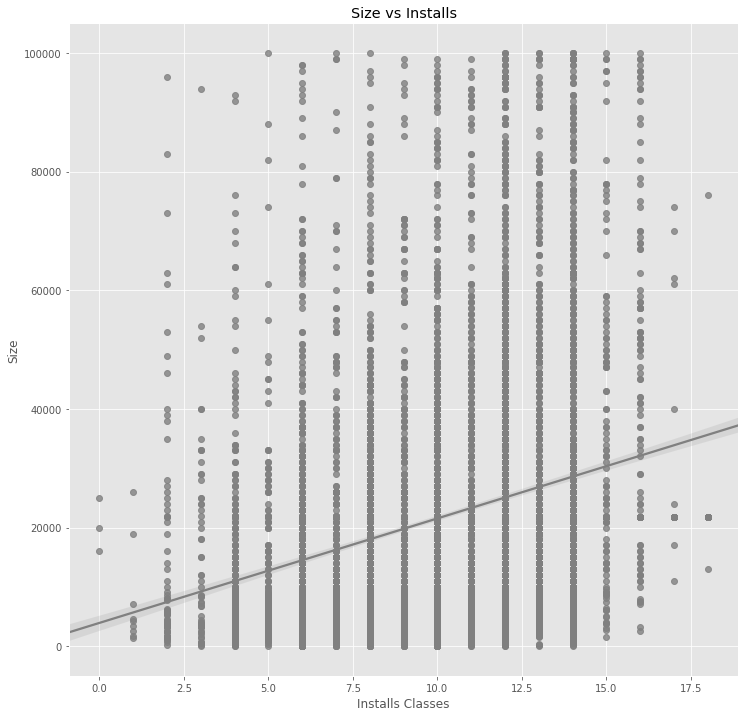

In [316]:
plt.figure(figsize= (12,12))
sns.regplot(y = df['Size'], x = df['Installs Classes'], color = 'grey')
plt.title('Size vs Installs')
plt.show()

It is pretty evident from the plot that mid-sized apps tend to perform mostly better.

### ----------------------------------------------------- TYPE---------------------------------------------------------------------------

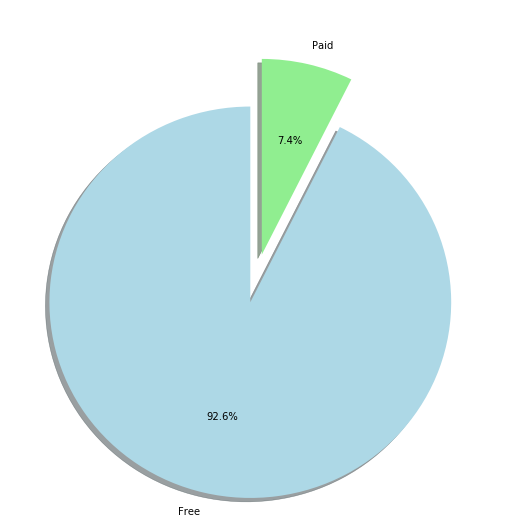

In [317]:
temp = df['Type'].value_counts().reset_index()

# plt.figure(figsize=(9,9))
rcParams['figure.figsize'] = 9,9
plt.pie(x = temp['Type'], labels= temp['index'], autopct= '%1.1f%%', colors = ['lightblue','lightgreen'], 
        shadow= True, explode=(0.25,0), startangle= 90)
plt.show()

Only 7.4% of the Apps in the store are paid apps

### ----------------------------------------------------- PRICE---------------------------------------------------------------------------

In [318]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

converting the type to float

In [319]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].astype('float')

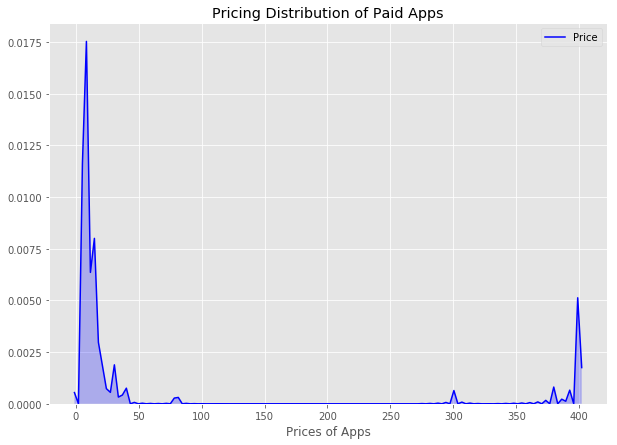

In [320]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['Type'] == 'Paid']['Price'], color = 'blue', shade = True)
plt.xlabel('Prices of Apps')
plt.title('Pricing Distribution of Paid Apps')
plt.show()

We can observe that even in the paid apps most of the apps are cheap!

### Rating vs Pricing

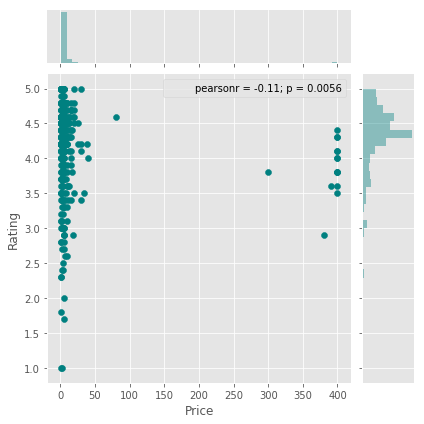

In [354]:
sns.jointplot(y = df[df['Type'] == 'Paid']['Rating'], x = df[df['Type'] == 'Paid']['Price'], color= 'teal')
plt.show()

The above suggests that even the most expensive apps do not have exceptionally better rating and even less rated than many cheaper apps.

We can better visualize pricing by breaking them down in different intervals.

In [322]:
df.loc[df['Price'] == 0,'Price_Class'] = 'Free'
df.loc[(df['Price'] > 0) & (df['Price'] <=1), 'Price_Class'] = 'Cheap'
df.loc[(df['Price'] > 1) & (df['Price'] <=3), 'Price_Class'] = 'Above Cheap'
df.loc[(df['Price'] > 3) & (df['Price'] <=6), 'Price_Class'] = 'Average'
df.loc[(df['Price'] > 6) & (df['Price'] <=16), 'Price_Class'] = 'Above Average'
df.loc[(df['Price'] > 16) & (df['Price'] <=40), 'Price_Class'] = 'Expensive'
df.loc[(df['Price'] > 40), 'Price_Class'] = 'Too Expensive'

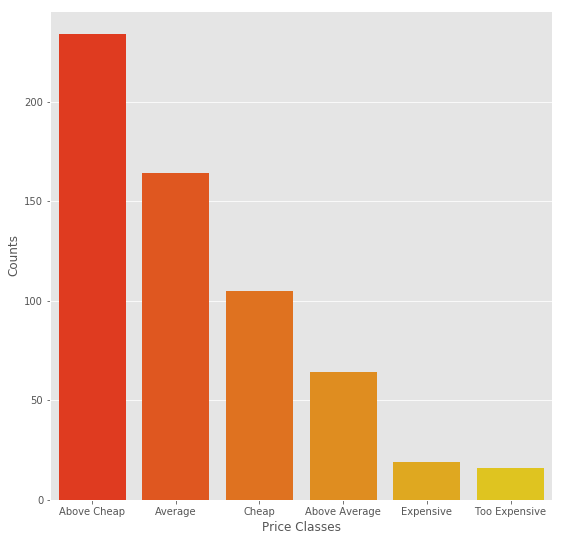

In [323]:
temp = df[df['Type'] == 'Paid']['Price_Class'].value_counts().reset_index()

sns.barplot(x = temp['index'], y = temp['Price_Class'], palette= 'autumn')
plt.xlabel('Price Classes')
plt.ylabel('Counts')
plt.show()

Pricing of the Apps is found to be mostly above Average(Normal)

In [324]:
df[['Price_Class','Rating','Reviews']].groupby('Price_Class').mean()

,Rating,Reviews
Price_Class,,
Above Average,4.209375,45545.062500
Above Cheap,4.291880,7519.782051
Average,4.245732,5814.823171
Cheap,4.303810,8932.504762
Expensive,4.205263,1040.052632
Free,4.166460,274831.482209
Too Expensive,3.912500,571.312500


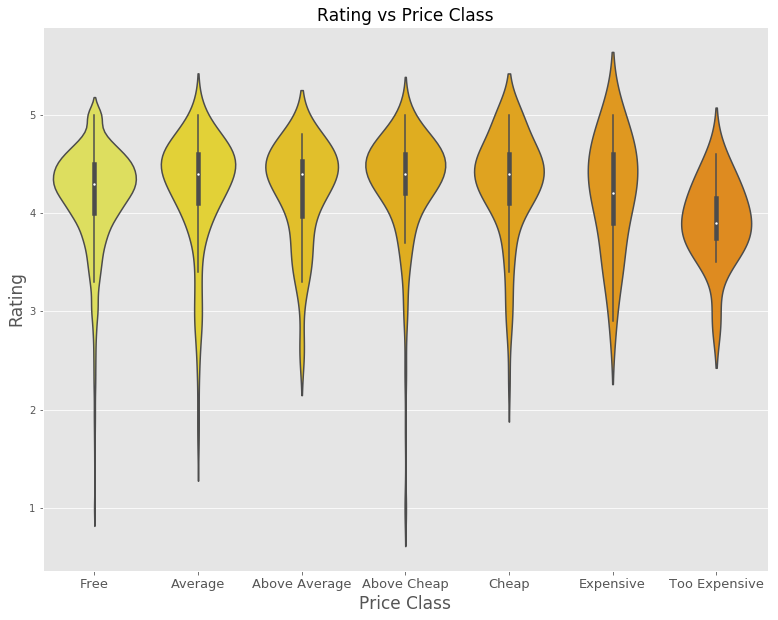

In [325]:
plt.figure(figsize=(13,10))
f = sns.violinplot(x = df['Price_Class'], y = df['Rating'], palette= 'Wistia')
f.set_xticklabels(f.get_xticklabels(), fontdict= {'fontsize':13})
f.set_xlabel('Price Class', fontdict= {'fontsize':17})
f.set_ylabel('Rating', fontdict= {'fontsize':17})
f.set_title('Rating vs Price Class',fontdict= {'fontsize':17})
plt.show()

As can be observed the **Too Expensive** apps have average **Rating** less than others.

### ----------------------------------------------------- Content Rating---------------------------------------------------------------------------

In [326]:
df['Content Rating'].head()

0    Everyone
1    Everyone
2    Everyone
3        Teen
4    Everyone
Name: Content Rating, dtype: object

In [327]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

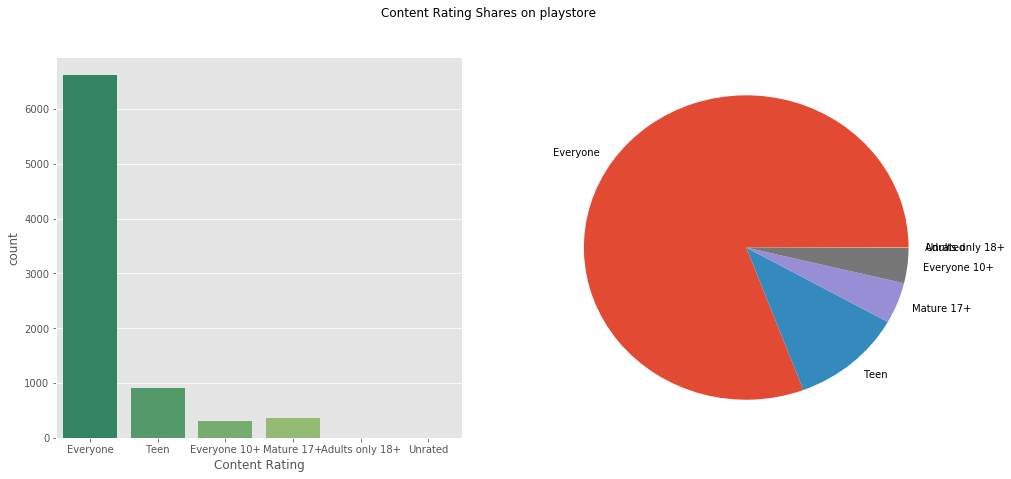

In [328]:
plt.figure(figsize=(16,7))
plt.suptitle('Content Rating Shares on playstore')
plt.subplot(1,2,1)
sns.countplot(x = df['Content Rating'], palette='summer')

plt.subplot(1,2,2)
temp = df['Content Rating'].value_counts().reset_index()
plt.pie(x = temp['Content Rating'], labels = temp['index'])

plt.show()

As observed the **Adult** or **Unrated** apps are almost nil

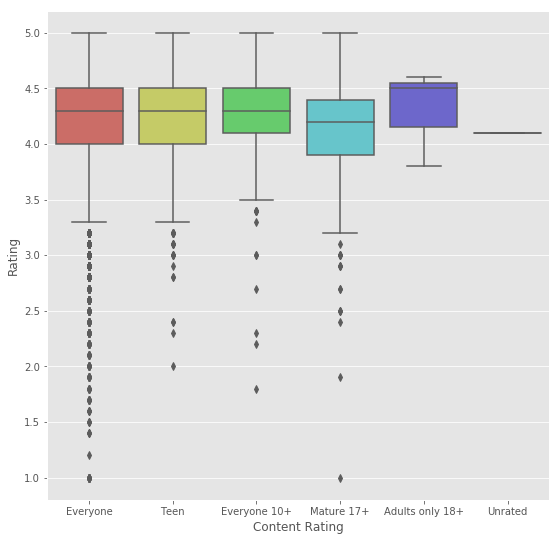

In [329]:
sns.boxplot(x = df['Content Rating'], y = df['Rating'], palette= 'hls')

There is not much effect of the **Content Rating** on the **Rating**, the better rating trend in adult and unrated apps is due to very few observations.

### ----------------------------------------------------- GENRE ---------------------------------------------------------------------------

In [330]:
df['Genres'].head()

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object

In [331]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [332]:
df['Genres'].value_counts()

Tools                                    716
Entertainment                            471
Education                                429
Finance                                  302
Productivity                             301
Lifestyle                                300
Personalization                          296
Action                                   292
Medical                                  290
Sports                                   266
Photography                              263
Business                                 263
Communication                            256
Health & Fitness                         244
News & Magazines                         204
Social                                   203
Simulation                               187
Travel & Local                           186
Shopping                                 180
Arcade                                   171
Books & Reference                        169
Casual                                   157
Video Play

Many of the **Genres** in the column have sub-genres so we better omit them

In [333]:
df['Genres'] = df['Genres'].apply(lambda x: x.split(';')[0])
df['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [334]:
df['Genres'].value_counts()

Tools                      717
Entertainment              502
Education                  498
Action                     304
Finance                    302
Lifestyle                  302
Productivity               301
Personalization            296
Medical                    290
Sports                     270
Business                   263
Photography                263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     122
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

As we can observe that **Music** and **Music & Audio** are redundant so we better convert them as one.

In [335]:
df['Genres'].replace('Music & Audio','Music', inplace = True)

In [336]:
df['Genres'].value_counts().tail()

Beauty    42
Casino    37
Trivia    28
Music     22
Word      22
Name: Genres, dtype: int64

Geeting the mean **Rating** and **Reviews** of each genre.

In [337]:
temp = df[['Genres','Rating','Reviews']].groupby(by = 'Genres').mean().sort_values(by = 'Rating',ascending = False)
print(temp.head(1))
print(temp.tail(1))

          Rating      Reviews
Genres                       
Events  4.435556  3568.666667
          Rating       Reviews
Genres                        
Dating  3.970149  27039.634328


As observed the **Dating** genre is the least rated on average, but there is not a very vast difference to the highest averagely rated **Events** genre.

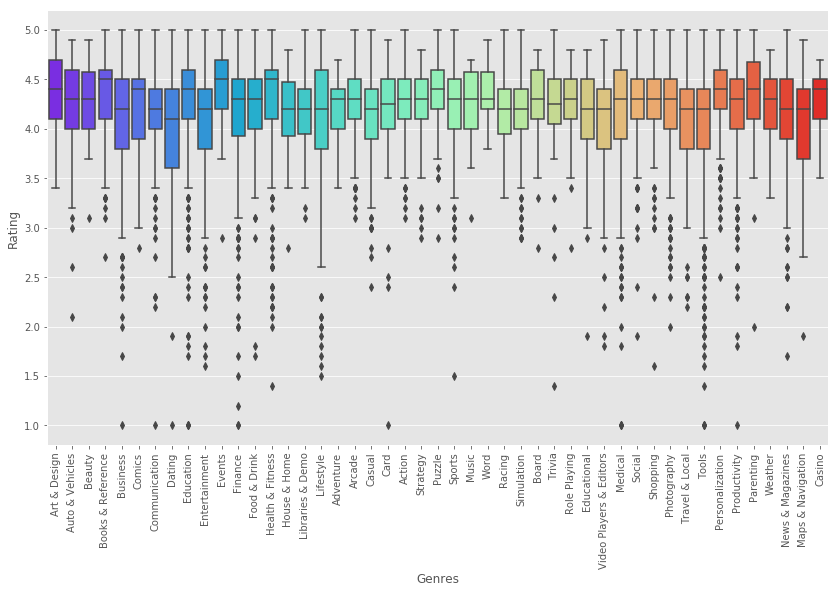

In [338]:
plt.figure(figsize=(14,8))
f = sns.boxplot(x = df['Genres'], y = df['Rating'], palette= 'rainbow')
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.show()

### ----------------------------------------------------- Last Updated ---------------------------------------------------------------------------

In [339]:
df['Last Updated'].head(10)

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

The dates need to parsed from strings to dates

You can follow the kernel [here](https://www.kaggle.com/hashbanger/data-cleaning-challenge-parsing-dates) for datetime handling in pandas

In [340]:
from datetime import datetime

In [341]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

Finding the lastest update in the data

In [342]:
df['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

Getting the last update in days form

In [343]:
df['Last Updated TimeDelta'] = df['Last Updated'].max() - df['Last Updated'] 
print(df['Last Updated TimeDelta'][0])

213 days 00:00:00


The observation above has a timedelta format so we can get days count from it

Now we can look if there's a relation with rating and last update

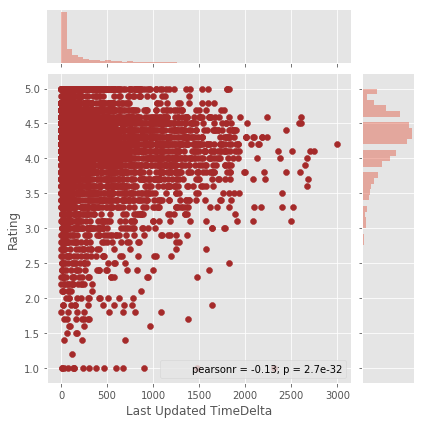

In [344]:
sns.jointplot(df['Last Updated TimeDelta'].dt.days, df['Rating'], COLOR = 'brown')
plt.show()

There's not a very strong effect of update on the app ratings

### -------------------------------------------Exploring Correlations--------------------------------------------------------------

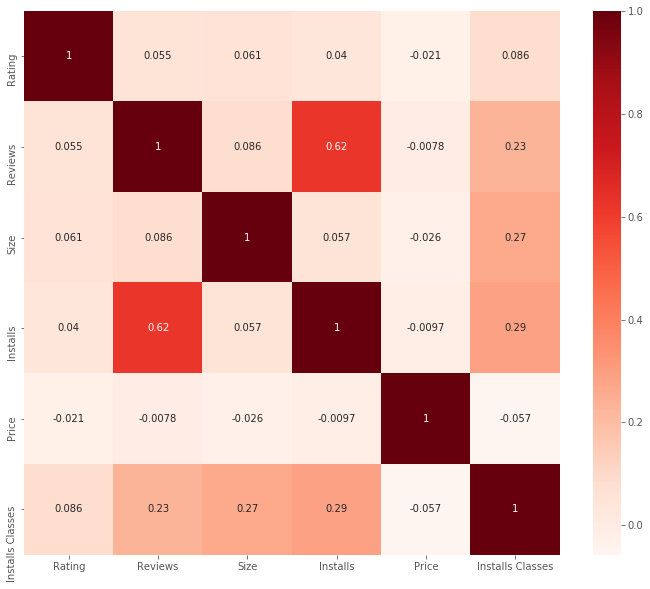

In [345]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.show()

There's one noticeable strong relation between **Reviews** and **Installs** which could mean that people tend to reviewed(likely download) the apps more reviewed than most rated.  

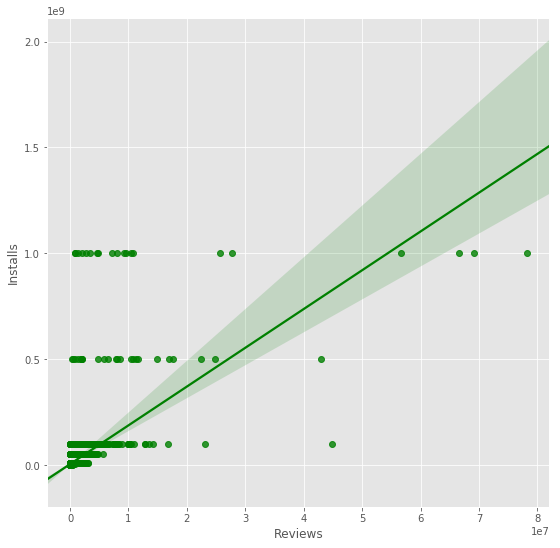

In [346]:
sns.regplot(x = df['Reviews'], y = df['Installs'], color = 'green')

# de nada!

Any suggestions or corrections are very much welcome!
